<a href="https://colab.research.google.com/github/srivatsan88/YouTubeLI/blob/master/statistics/Statistical_Thinking_Normality_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api as sm

%matplotlib inline


In [ ]:
marketing_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/marketing_cva_f.csv')

In [ ]:
marketing_df.head()

,Customer,State,CLV,Coverage,Income,loc_type,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age
0,BU79786,Washington,2763.519279,Basic,56274,Suburban,69,32,5,384.811147,Two-Door Car,40.696695
1,AI49188,Nevada,12887.431650,Premium,48767,Suburban,108,18,38,566.472247,Two-Door Car,48.755298
2,HB64268,Washington,2813.692575,Basic,43836,Rural,73,12,44,138.130879,Four-Door Car,70.394474
3,OC83172,Oregon,8256.297800,Basic,62902,Rural,69,14,94,159.383042,Two-Door Car,53.460212
4,XZ87318,Oregon,5380.898636,Basic,55350,Suburban,67,0,13,321.600000,Four-Door Car,32.811507


In [ ]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       6817 non-null   object 
 1   State                          6817 non-null   object 
 2   CLV                            6817 non-null   float64
 3   Coverage                       6817 non-null   object 
 4   Income                         6817 non-null   int64  
 5   loc_type                       6817 non-null   object 
 6   monthly_premium                6817 non-null   int64  
 7   months_last_claim              6817 non-null   int64  
 8   Months_Since_Policy_Inception  6817 non-null   int64  
 9   Total_Claim_Amount             6817 non-null   float64
 10  Vehicle_Class                  6817 non-null   object 
 11  avg_vehicle_age                6817 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage:

In [ ]:
print ("Rows     : " ,marketing_df.shape[0])
print ("Columns  : " ,marketing_df.shape[1])
print ("\nFeatures : \n" ,marketing_df.columns.tolist())
print ("\nMissing values :  ", marketing_df.isnull().any())


Rows     :  6817
Columns  :  12

Features : 
 ['Customer', 'State', 'CLV', 'Coverage', 'Income', 'loc_type', 'monthly_premium', 'months_last_claim', 'Months_Since_Policy_Inception', 'Total_Claim_Amount', 'Vehicle_Class', 'avg_vehicle_age']

Missing values :   Customer                         False
State                            False
CLV                              False
Coverage                         False
Income                           False
loc_type                         False
monthly_premium                  False
months_last_claim                False
Months_Since_Policy_Inception    False
Total_Claim_Amount               False
Vehicle_Class                    False
avg_vehicle_age                  False
dtype: bool


In [ ]:
marketing_df.describe()

,CLV,Income,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,avg_vehicle_age
count,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000
mean,8130.229340,50456.580461,92.963034,15.046941,47.832624,377.840789,50.126257
std,6949.067972,24305.956566,34.615160,10.064762,27.895350,252.648952,9.919767
min,2119.894333,10037.000000,61.000000,0.000000,0.000000,0.099007,11.875974
25%,4090.750678,28432.000000,68.000000,6.000000,24.000000,210.100003,43.449925
50%,5810.630529,48081.000000,83.000000,14.000000,48.000000,340.800000,50.100924
75%,9075.768214,70187.000000,109.000000,23.000000,71.000000,498.612632,56.877234
max,83325.381190,99981.000000,297.000000,35.000000,99.000000,2893.239678,83.387485


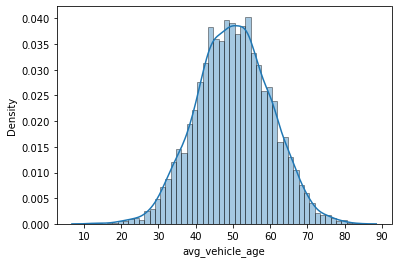

In [ ]:
sns.distplot(marketing_df['avg_vehicle_age'], hist=True, hist_kws=dict(ec="k"))

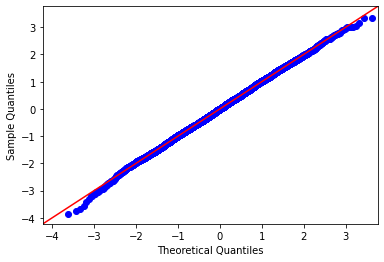

In [ ]:
plot=sm.qqplot(marketing_df['avg_vehicle_age'], line = "45", fit = True)

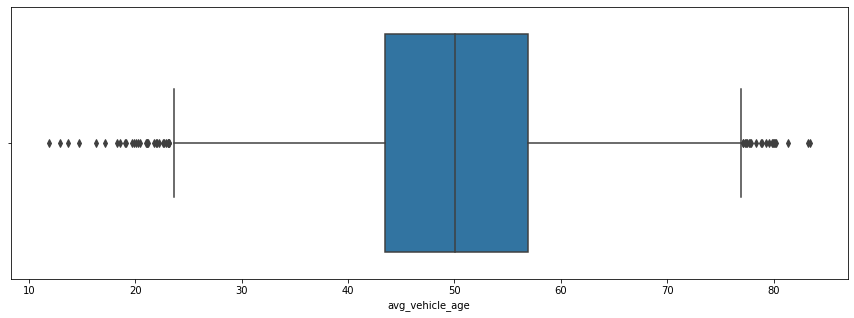

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x="avg_vehicle_age", data=marketing_df)

null hypothesis - data came from a normal distribution

Alternate hypothesis - unlikely that the data came from a normal distribution

In [ ]:
chi2, p = stats.normaltest(marketing_df['avg_vehicle_age'])
print('Chi2 = %.2f, pvalue = %.3f' % (chi2, p))

Chi2 = 1.04, pvalue = 0.593


Null hypothesis - Sample is drawn from a population that follows a particular distribution

Alternate Hypothesis - data did not come from the chosen distribution 

In [ ]:
stats.anderson(marketing_df['avg_vehicle_age'],dist='norm')

AndersonResult(statistic=0.38327277704684093, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
from scipy import stats
_ , l = stats.boxcox(marketing_df['avg_vehicle_age'])

In [ ]:
print ("lamda     : " ,l)

lamda     :  1.0401662851027633


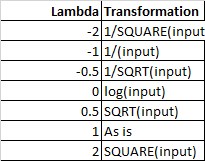

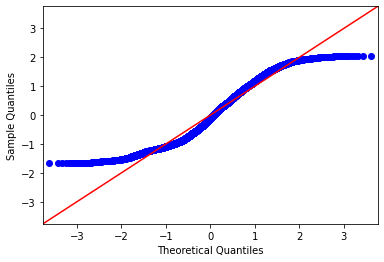

In [ ]:
plot=sm.qqplot(marketing_df['Income'], line = "45", fit = True)

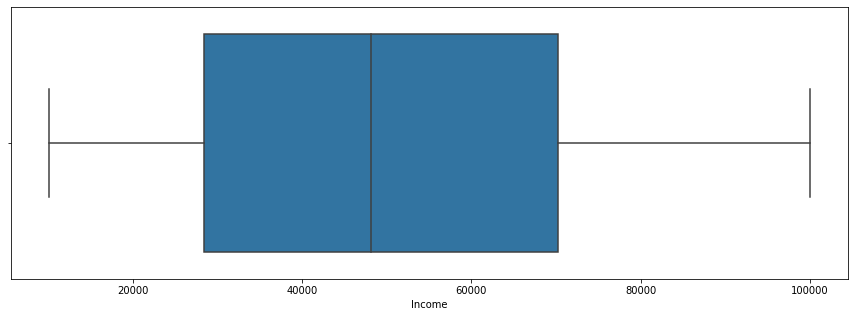

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Income", data=marketing_df)

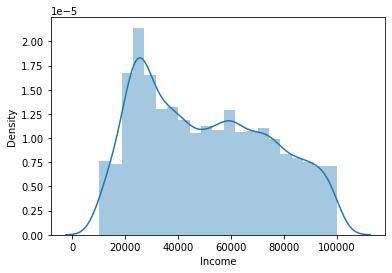

In [ ]:
sns.distplot(marketing_df['Income'], hist=True)

In [ ]:
stats.anderson(marketing_df['Income'],dist='norm')

AndersonResult(statistic=94.67577589421035, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
_, l = stats.boxcox(marketing_df['Income'])

In [ ]:
print ("lamda     : " ,l)

lamda     :  0.44437538279540056


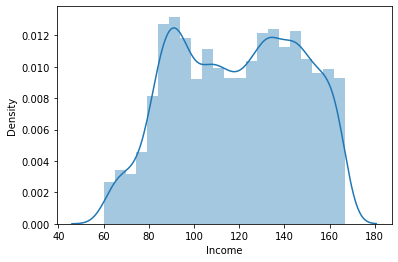

In [ ]:
sns.distplot(marketing_df['Income'].apply(lambda x: np.power(x, l)), hist=True)

In [ ]:
stats.boxcox(marketing_df['Income'].apply(lambda x: np.power(x, l)))

(array([128.09819109, 120.14015208, 114.53556654, ..., 142.98627724,
         83.36466029,  83.94694497]), 1.0000001881629772)

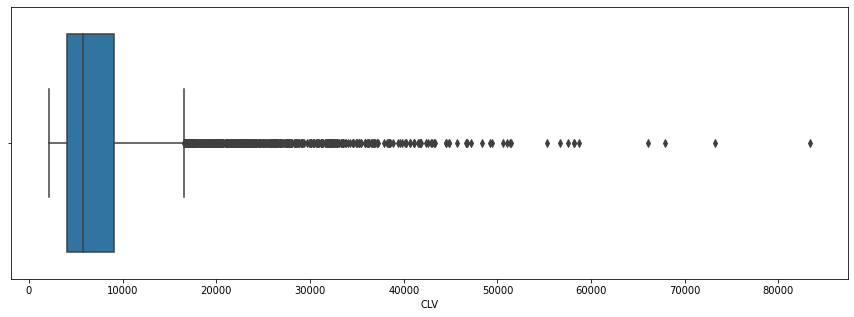

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x="CLV", data=marketing_df)

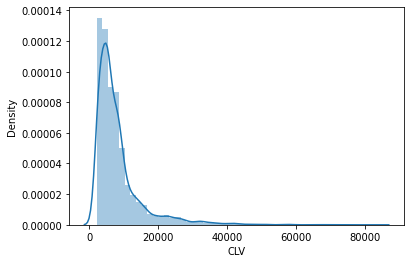

In [ ]:
sns.distplot(marketing_df['CLV'], hist=True)

In [ ]:
_, l = stats.boxcox(marketing_df['CLV'])

In [ ]:
print ("lamda     : " ,l)

lamda     :  -0.3628046005612987


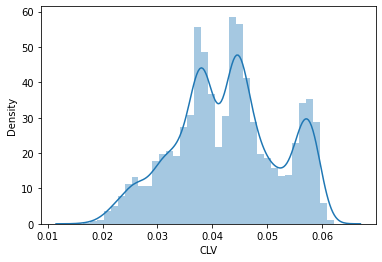

In [ ]:
sns.distplot(marketing_df['CLV'].apply(lambda x: 1/np.power(x,np.abs(l))), hist=True)

In [ ]:
stats.boxcox(marketing_df['CLV'].apply(lambda x: 1/np.power(x,np.abs(l))))

(array([-0.94358158, -0.96772907, -0.94394867, ..., -0.97401118,
        -0.94586294, -0.96077198]), 0.9999998972585702)

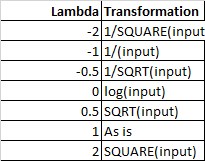